In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
import scipy.stats as stats

In [3]:


def comprehensive_statistical_analysis(data, bins=50, figsize=(12, 8)):
    """
    对numpy数组进行全面的统计性质分析并绘制直方图
    
    Parameters:
    -----------
    data : numpy.ndarray
        输入数据数组
    bins : int
        直方图的箱数
    figsize : tuple
        图形大小
    """
    
    # 数据预处理：展平数组
    flat_data = data.flatten()
    n_total = len(flat_data)
    
    # 计算基本统计量
    mean_val = np.mean(flat_data)
    median_val = np.median(flat_data)
    std_val = np.std(flat_data)
    var_val = np.var(flat_data)
    min_val = np.min(flat_data)
    max_val = np.max(flat_data)
    range_val = max_val - min_val
    
    # 计算MAD (Median Absolute Deviation)
    mad_val = np.median(np.abs(flat_data - median_val))
    
    # 计算分位数
    q1 = np.percentile(flat_data, 25)
    q3 = np.percentile(flat_data, 75)
    iqr = q3 - q1
    
    # 计算偏度和峰度
    skewness = stats.skew(flat_data)
    kurtosis = stats.kurtosis(flat_data)
    
    # 计算异常值界限 (基于MAD)
    lower_bound = median_val - 10 * mad_val
    upper_bound = median_val + 10 * mad_val
    
    # 裁剪数据到median ± 10*MAD范围
    clipped_data = np.clip(flat_data, lower_bound, upper_bound)
    n_clipped = len(clipped_data)
    
    # 计算裁剪后数据的统计量
    clipped_mean = np.mean(clipped_data)
    clipped_std = np.std(clipped_data)
    
    # 创建图形
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)
    
    # 子图1: 原始数据直方图
    ax1.hist(flat_data, bins=bins, alpha=0.7, color='blue', edgecolor='black')
    ax1.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.4f}')
    ax1.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.4f}')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Original Data Distribution')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 子图2: 裁剪后数据直方图
    ax2.hist(clipped_data, bins=bins, alpha=0.7, color='orange', edgecolor='black')
    ax2.axvline(clipped_mean, color='red', linestyle='--', linewidth=2, label=f'Clipped Mean: {clipped_mean:.4f}')
    ax2.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.4f}')
    ax2.axvline(lower_bound, color='gray', linestyle=':', linewidth=1, label=f'Lower bound: {lower_bound:.4f}')
    ax2.axvline(upper_bound, color='gray', linestyle=':', linewidth=1, label=f'Upper bound: {upper_bound:.4f}')
    ax2.set_xlabel('Value')
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'Clipped Data Distribution\n(median ± 10*MAD)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 子图3: 箱线图比较
    boxplot_data = [flat_data, clipped_data]
    ax3.boxplot(boxplot_data, labels=['Original', 'Clipped'])
    ax3.set_ylabel('Value')
    ax3.set_title('Boxplot Comparison')
    ax3.grid(True, alpha=0.3)
    
    # 子图4: Q-Q图 (检查正态性)
    stats.probplot(clipped_data, dist="norm", plot=ax4)
    ax4.set_title('Q-Q Plot (Clipped Data)')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 打印统计摘要
    print("=" * 60)
    print("COMPREHENSIVE STATISTICAL ANALYSIS REPORT")
    print("=" * 60)
    
    print(f"\nBASIC STATISTICS:")
    print(f"Data shape: {data.shape}")
    print(f"Total samples: {n_total:,}")
    print(f"Mean: {mean_val:.6f}")
    print(f"Median: {median_val:.6f}")
    print(f"Standard deviation: {std_val:.6f}")
    print(f"Variance: {var_val:.6f}")
    print(f"Minimum: {min_val:.6f}")
    print(f"Maximum: {max_val:.6f}")
    print(f"Range: {range_val:.6f}")
    
    print(f"\nROBUST STATISTICS:")
    print(f"MAD (Median Absolute Deviation): {mad_val:.6f}")
    print(f"Q1 (25th percentile): {q1:.6f}")
    print(f"Q3 (75th percentile): {q3:.6f}")
    print(f"IQR (Interquartile Range): {iqr:.6f}")
    
    print(f"\nHIGHER MOMENTS:")
    print(f"Skewness: {skewness:.6f}")
    print(f"Kurtosis: {kurtosis:.6f}")
    
    print(f"\nCLIPPING INFORMATION:")
    print(f"Lower bound (median - 10*MAD): {lower_bound:.6f}")
    print(f"Upper bound (median + 10*MAD): {upper_bound:.6f}")
    print(f"Samples after clipping: {n_clipped:,}")
    print(f"Percentage kept: {(n_clipped/n_total*100):.2f}%")
    
    print(f"\nCLIPPED DATA STATISTICS:")
    print(f"Clipped mean: {clipped_mean:.6f}")
    print(f"Clipped standard deviation: {clipped_std:.6f}")
    
    # 返回统计结果字典
    results = {
        'original_data': flat_data,
        'clipped_data': clipped_data,
        'basic_stats': {
            'mean': mean_val,
            'median': median_val,
            'std': std_val,
            'variance': var_val,
            'min': min_val,
            'max': max_val,
            'range': range_val
        },
        'robust_stats': {
            'mad': mad_val,
            'q1': q1,
            'q3': q3,
            'iqr': iqr
        },
        'higher_moments': {
            'skewness': skewness,
            'kurtosis': kurtosis
        },
        'clipping_info': {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'n_original': n_total,
            'n_clipped': n_clipped
        }
    }
    
    return results

['ACE_Bz_2012', 'ACE_Psw_2012', 'ACE_Vsw_2012']
ACE_Bz_2012: shape=(2, 527040), dtype=float64


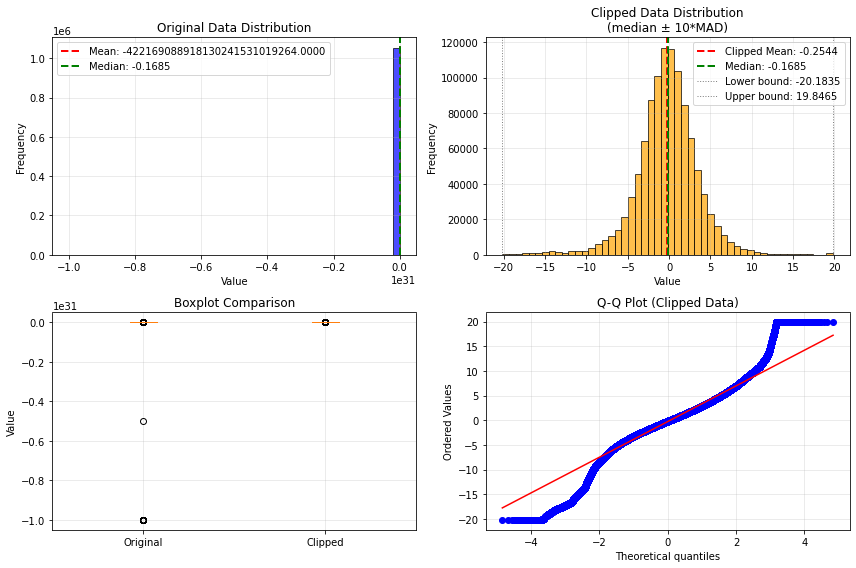

COMPREHENSIVE STATISTICAL ANALYSIS REPORT

BASIC STATISTICS:
Data shape: (2, 527040)
Total samples: 1,054,080
Mean: -422169088918130241531019264.000000
Median: -0.168500
Standard deviation: 64790394613619997833802285056.000000
Variance: 4197795234188599635477633404861604150065166773077221048320.000000
Minimum: -9999999848243207295109594873856.000000
Maximum: 42.027000
Range: 9999999848243207295109594873856.000000

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 2.001500
Q1 (25th percentile): -2.174000
Q3 (75th percentile): 1.827000
IQR (Interquartile Range): 4.001000

HIGHER MOMENTS:
Skewness: -153.894851
Kurtosis: 23715.083336

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -20.183499
Upper bound (median + 10*MAD): 19.846499
Samples after clipping: 1,054,080
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: -0.254415
Clipped standard deviation: 3.690943
ACE_Psw_2012: shape=(1, 527040), dtype=float64


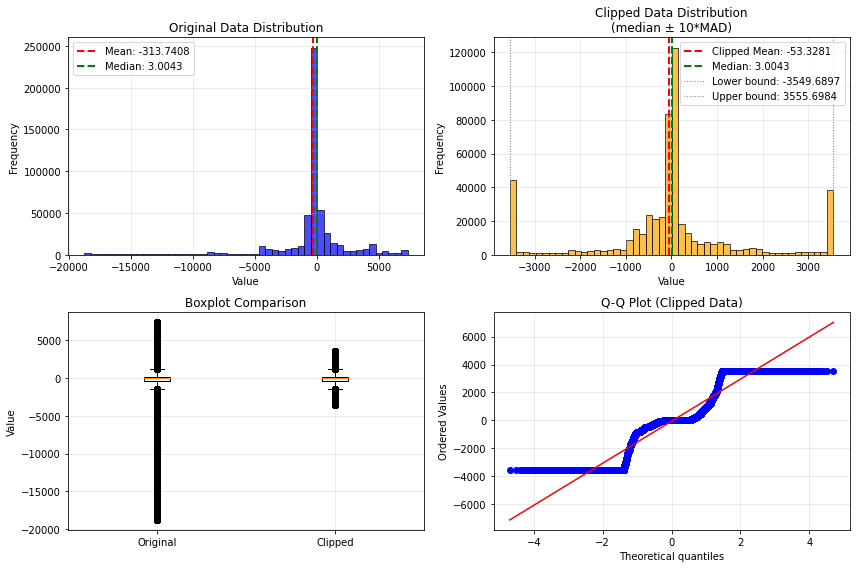

COMPREHENSIVE STATISTICAL ANALYSIS REPORT

BASIC STATISTICS:
Data shape: (1, 527040)
Total samples: 527,040
Mean: -313.740768
Median: 3.004339
Standard deviation: 3148.295018
Variance: 9911761.521547
Minimum: -18759.978554
Maximum: 7370.002995
Range: 26129.981548

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 355.269407
Q1 (25th percentile): -446.628585
Q3 (75th percentile): 206.751235
IQR (Interquartile Range): 653.379821

HIGHER MOMENTS:
Skewness: -2.572720
Kurtosis: 12.585241

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -3549.689733
Upper bound (median + 10*MAD): 3555.698411
Samples after clipping: 527,040
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: -53.328130
Clipped standard deviation: 1626.703820
ACE_Vsw_2012: shape=(1, 527040), dtype=float64


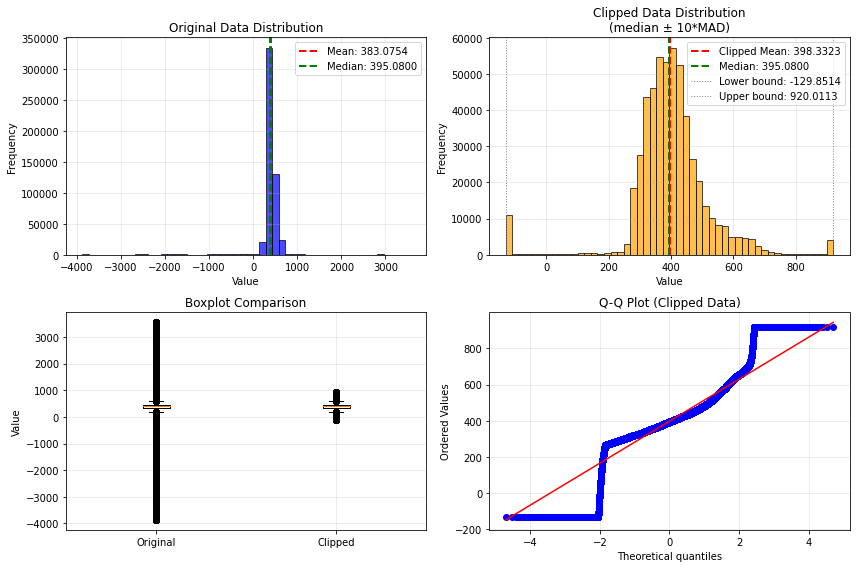

COMPREHENSIVE STATISTICAL ANALYSIS REPORT

BASIC STATISTICS:
Data shape: (1, 527040)
Total samples: 527,040
Mean: 383.075381
Median: 395.079987
Standard deviation: 341.192350
Variance: 116412.219911
Minimum: -3868.681898
Maximum: 3551.261744
Range: 7419.943641

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 52.493134
Q1 (25th percentile): 342.670013
Q3 (75th percentile): 447.649994
IQR (Interquartile Range): 104.979980

HIGHER MOMENTS:
Skewness: -3.882060
Kurtosis: 62.063017

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -129.851355
Upper bound (median + 10*MAD): 920.011329
Samples after clipping: 527,040
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: 398.332301
Clipped standard deviation: 126.800515


In [17]:
fpa = r"data\ACE_2012.mat"
with h5py.File(fpa, 'r') as f:
    # 查看文件中的所有变量
    print(list(f.keys()))
    for key in f.keys():
        data = f[key][:]
        print(f"{key}: shape={data.shape}, dtype={data.dtype}")
        _ = comprehensive_statistical_analysis(data)

['OMNI_AE_2012', 'OMNI_ASYMH_2012', 'OMNI_PC_2012', 'OMNI_SYMH_2012']
OMNI_AE_2012: shape=(1, 527040), dtype=float64


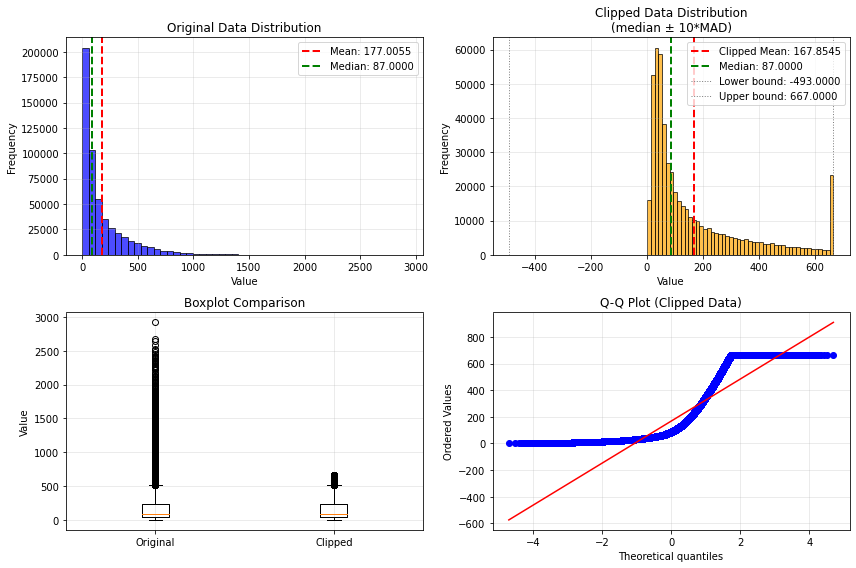

COMPREHENSIVE STATISTICAL ANALYSIS REPORT

BASIC STATISTICS:
Data shape: (1, 527040)
Total samples: 527,040
Mean: 177.005482
Median: 87.000000
Standard deviation: 212.369782
Variance: 45100.924479
Minimum: 2.000000
Maximum: 2919.000000
Range: 2917.000000

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 58.000000
Q1 (25th percentile): 42.000000
Q3 (75th percentile): 232.000000
IQR (Interquartile Range): 190.000000

HIGHER MOMENTS:
Skewness: 2.344803
Kurtosis: 7.229089

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -493.000000
Upper bound (median + 10*MAD): 667.000000
Samples after clipping: 527,040
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: 167.854542
Clipped standard deviation: 179.345497
OMNI_ASYMH_2012: shape=(1, 527040), dtype=float64


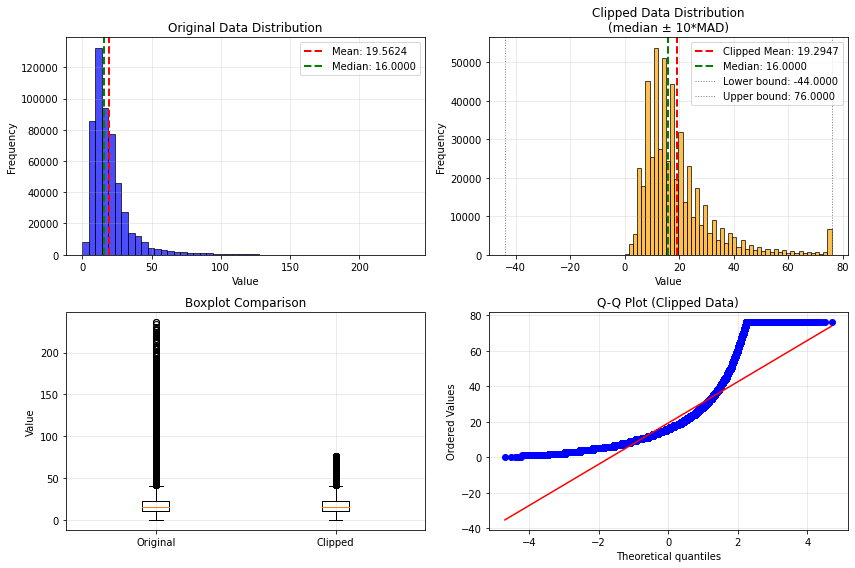

COMPREHENSIVE STATISTICAL ANALYSIS REPORT

BASIC STATISTICS:
Data shape: (1, 527040)
Total samples: 527,040
Mean: 19.562371
Median: 16.000000
Standard deviation: 14.464014
Variance: 209.207714
Minimum: 0.000000
Maximum: 236.000000
Range: 236.000000

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 6.000000
Q1 (25th percentile): 11.000000
Q3 (75th percentile): 23.000000
IQR (Interquartile Range): 12.000000

HIGHER MOMENTS:
Skewness: 3.222121
Kurtosis: 17.850633

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -44.000000
Upper bound (median + 10*MAD): 76.000000
Samples after clipping: 527,040
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: 19.294750
Clipped standard deviation: 12.913402
OMNI_PC_2012: shape=(1, 527040), dtype=float64


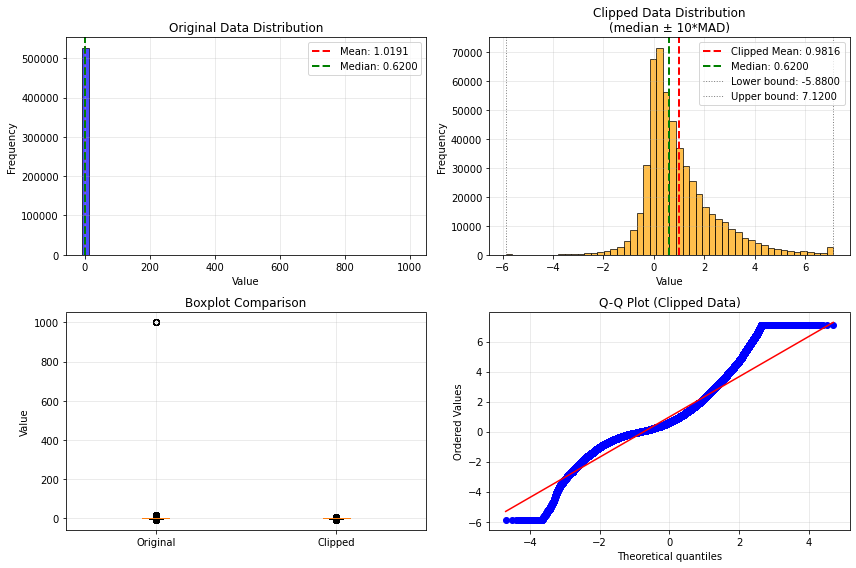

COMPREHENSIVE STATISTICAL ANALYSIS REPORT

BASIC STATISTICS:
Data shape: (1, 527040)
Total samples: 527,040
Mean: 1.019139
Median: 0.620000
Standard deviation: 5.527239
Variance: 30.550370
Minimum: -7.630000
Maximum: 999.989990
Range: 1007.619990

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 0.650000
Q1 (25th percentile): 0.080000
Q3 (75th percentile): 1.580000
IQR (Interquartile Range): 1.500000

HIGHER MOMENTS:
Skewness: 168.059907
Kurtosis: 30365.740276

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -5.880000
Upper bound (median + 10*MAD): 7.120000
Samples after clipping: 527,040
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: 0.981648
Clipped standard deviation: 1.410208
OMNI_SYMH_2012: shape=(1, 527040), dtype=float64


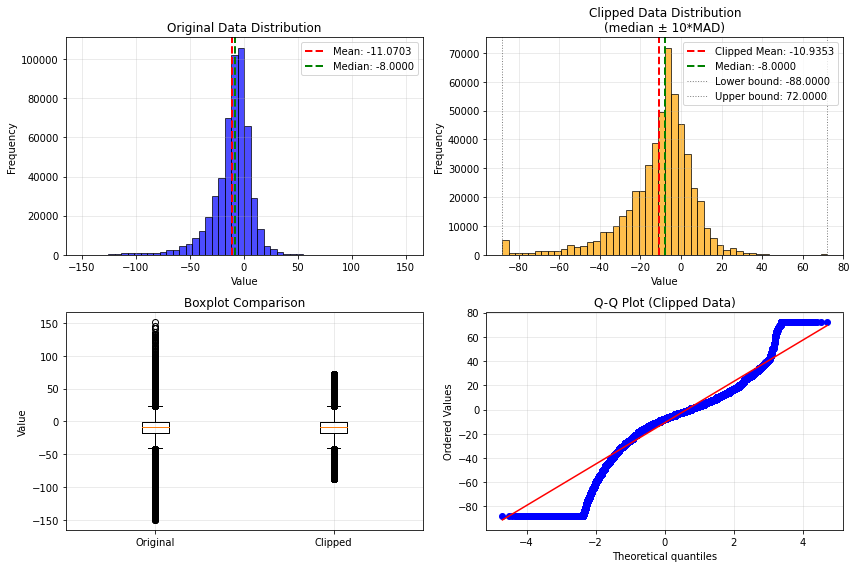

COMPREHENSIVE STATISTICAL ANALYSIS REPORT

BASIC STATISTICS:
Data shape: (1, 527040)
Total samples: 527,040
Mean: -11.070346
Median: -8.000000
Standard deviation: 18.755921
Variance: 351.784572
Minimum: -150.000000
Maximum: 151.000000
Range: 301.000000

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 8.000000
Q1 (25th percentile): -17.000000
Q3 (75th percentile): -1.000000
IQR (Interquartile Range): 16.000000

HIGHER MOMENTS:
Skewness: -1.660399
Kurtosis: 6.600473

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -88.000000
Upper bound (median + 10*MAD): 72.000000
Samples after clipping: 527,040
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: -10.935318
Clipped standard deviation: 18.015317


In [18]:
fpo = r"data\OMNI_2012.mat"
with h5py.File(fpo, 'r') as f:
    # 查看文件中的所有变量
    print(list(f.keys()))
    for key in f.keys():
        data = f[key][:]
        print(f"{key}: shape={data.shape}, dtype={data.dtype}")
        _=comprehensive_statistical_analysis(data)

['ACE_Bz_2012', 'ACE_Psw_2012', 'ACE_Vsw_2012']
ACE_Bz_2012: shape=(2, 527040), dtype=float64


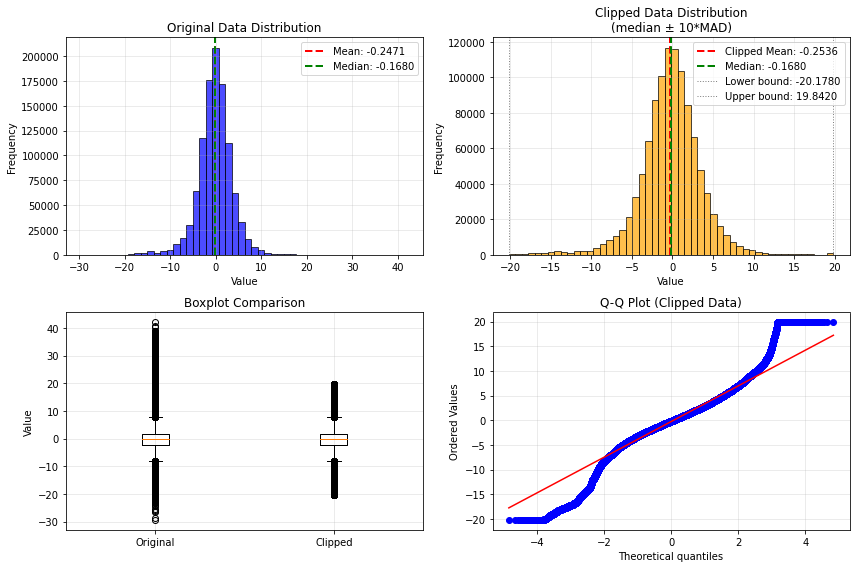

COMPREHENSIVE STATISTICAL ANALYSIS REPORT

BASIC STATISTICS:
Data shape: (2, 527040)
Total samples: 1,054,080
Mean: -0.247128
Median: -0.168000
Standard deviation: 3.735161
Variance: 13.951428
Minimum: -29.364000
Maximum: 42.027000
Range: 71.391001

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 2.001000
Q1 (25th percentile): -2.174000
Q3 (75th percentile): 1.827000
IQR (Interquartile Range): 4.001000

HIGHER MOMENTS:
Skewness: -0.119943
Kurtosis: 5.595847

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -20.177999
Upper bound (median + 10*MAD): 19.841999
Samples after clipping: 1,054,080
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: -0.253556
Clipped standard deviation: 3.688625


In [19]:
fpa = r"data\ACE_2012.mat"
with h5py.File(fpa, 'r') as f:
    # 查看文件中的所有变量
    print(list(f.keys()))
    for key in f.keys():
        data = f[key][:]
        print(f"{key}: shape={data.shape}, dtype={data.dtype}")
        data_ = data.copy()
        data_[data_<-1e3] = 0
        _ = comprehensive_statistical_analysis(data_)
        break

['OMNI_AE_2012', 'OMNI_ASYMH_2012', 'OMNI_PC_2012', 'OMNI_SYMH_2012']
OMNI_PC_2012: shape=(1, 527040), dtype=float64


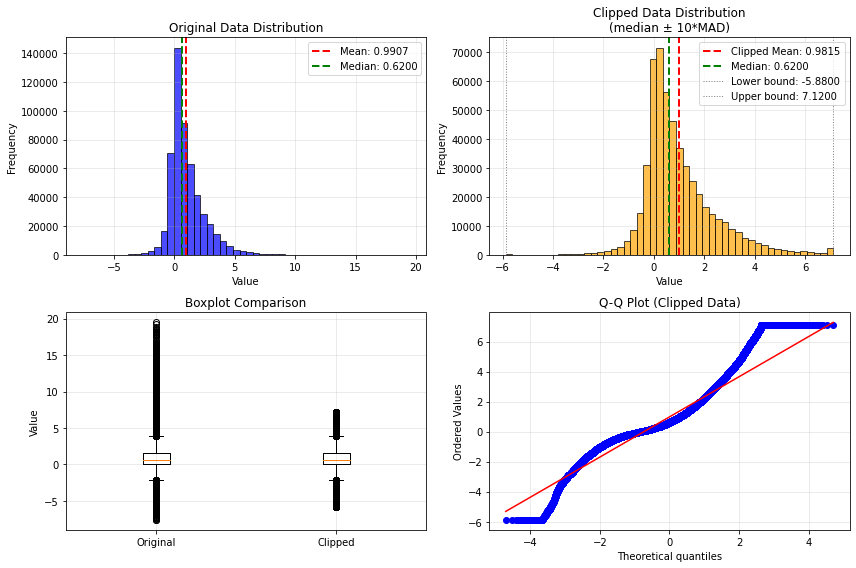

COMPREHENSIVE STATISTICAL ANALYSIS REPORT

BASIC STATISTICS:
Data shape: (1, 527040)
Total samples: 527,040
Mean: 0.990707
Median: 0.620000
Standard deviation: 1.465358
Variance: 2.147274
Minimum: -7.630000
Maximum: 19.490000
Range: 27.120000

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 0.650000
Q1 (25th percentile): 0.080000
Q3 (75th percentile): 1.580000
IQR (Interquartile Range): 1.500000

HIGHER MOMENTS:
Skewness: 1.775303
Kurtosis: 8.018435

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -5.880000
Upper bound (median + 10*MAD): 7.120000
Samples after clipping: 527,040
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: 0.981474
Clipped standard deviation: 1.409828


In [4]:
fpa = r"data\OMNI_2012.mat"
with h5py.File(fpa, 'r') as f:
    # 查看文件中的所有变量
    print(list(f.keys()))
    key='OMNI_PC_2012'
    
    data = f[key][:]
    print(f"{key}: shape={data.shape}, dtype={data.dtype}")
    data_ = data.copy()
    data_[data_>100] = 1
    _ = comprehensive_statistical_analysis(data_)


In [12]:
((data_ - 1)/1.465).max()

12.621160253322978

In [21]:
np.sum(data<-1e3)

45

In [1]:
from data_seq import create_data_loaders,get_original_data

In [2]:
data=get_original_data("data")

Using data: ACE_Bz_2012 ACE_Psw_2012 ACE_Vsw_2012 OMNI_AE_2012 OMNI_ASYMH_2012 OMNI_PC_2012 OMNI_SYMH_2012
All data cat shape: torch.Size([527040, 8])


In [3]:
data.shape

torch.Size([527040, 8])

In [ ]:
for i in range(8):
    print(i,data[:,i].max(),data[:,i].min())

0 tensor(10.8691) tensor(-7.8615)
1 tensor(11.2517) tensor(-7.1075)
2 tensor(2.3412) tensor(-5.9593)
3 tensor(9.2911) tensor(-12.4683)
4 tensor(12.9340) tensor(-0.8255)
5 tensor(15.5000) tensor(-1.3571)
6 tensor(12.6212) tensor(-5.8908)
7 tensor(8.6373) tensor(-7.4110)


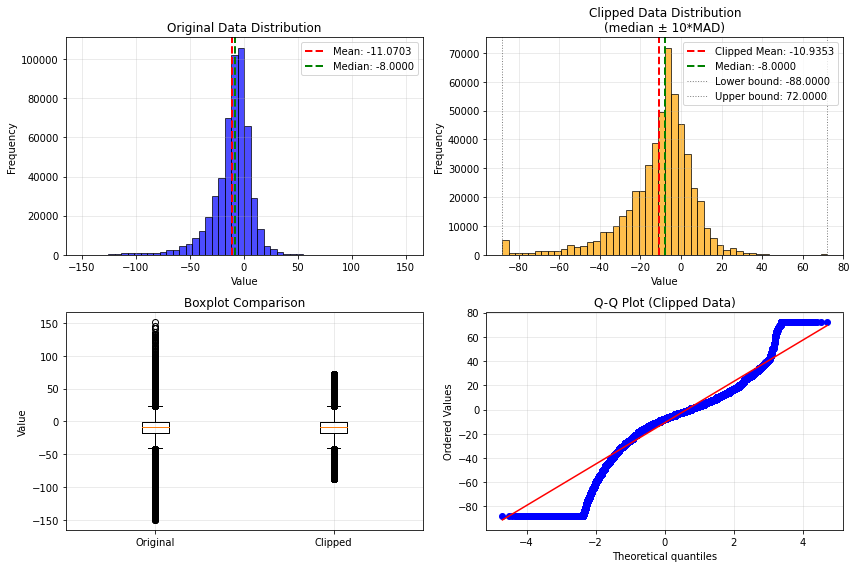

COMPREHENSIVE STATISTICAL ANALYSIS REPORT

BASIC STATISTICS:
Data shape: (527040,)
Total samples: 527,040
Mean: -11.070346
Median: -8.000000
Standard deviation: 18.755920
Variance: 351.784576
Minimum: -150.000000
Maximum: 151.000000
Range: 301.000000

ROBUST STATISTICS:
MAD (Median Absolute Deviation): 8.000000
Q1 (25th percentile): -17.000000
Q3 (75th percentile): -1.000000
IQR (Interquartile Range): 16.000000

HIGHER MOMENTS:
Skewness: -1.660399
Kurtosis: 6.600474

CLIPPING INFORMATION:
Lower bound (median - 10*MAD): -88.000000
Upper bound (median + 10*MAD): 72.000000
Samples after clipping: 527,040
Percentage kept: 100.00%

CLIPPED DATA STATISTICS:
Clipped mean: -10.935318
Clipped standard deviation: 18.015318


{'original_data': array([-12., -12., -11., ...,  -9.,  -9.,  -9.], dtype=float32),
 'clipped_data': array([-12., -12., -11., ...,  -9.,  -9.,  -9.], dtype=float32),
 'basic_stats': {'mean': -11.070346,
  'median': -8.0,
  'std': 18.75592,
  'variance': 351.78458,
  'min': -150.0,
  'max': 151.0,
  'range': 301.0},
 'robust_stats': {'mad': 8.0, 'q1': -17.0, 'q3': -1.0, 'iqr': 16.0},
 'higher_moments': {'skewness': -1.6603987767893347,
  'kurtosis': 6.6004743200561595},
 'clipping_info': {'lower_bound': -88.0,
  'upper_bound': 72.0,
  'n_original': 527040,
  'n_clipped': 527040}}

In [15]:
comprehensive_statistical_analysis(data[:,-1].numpy().T)